<h1 style="color: darkblue">Regresión Lineal</h1>

#### Introducción.

Cuando se tiene una serie de datos que siguen una tendencia en específico, se puede
modelar una ecuación lineal, polinomial, logarítmica, de varias variables, etc. que
sirva para explicar y hacer inferencias son los datos observados.

<img src="Images/rlineal.PNG">

El método que generalmente se usa para estimar este tipo de ecuaciones, los
modelos de regresión, es el método de mínimos cuadrados. Se llama así ya que
busca minimizar el cuadrado de la distancia entre los datos observados y su
ecuación.
Para un modelo lineal, como el que se observa en las figuras superiores, se desea
estimar una función del tipo:

### $$y = \beta_0 + \beta_1 x + \epsilon_i$$

Donde 𝑦 es la variable dependiente que se desea explicar en términos de 𝑥, 𝛽0 es el
intercepto de la función lineal o el valor que se espera de 𝑦 cuando 𝑥 = 0. 𝛽1 mide
el cambio en 𝑦 dado un cambio en 𝑥. Por último, 𝜖 son los errores o residuos que se
dan con la diferencia entre el modelo estimado y los datos reales.
Entonces, para hacer un ajuste lineal, se deben encontrar los valores de $𝛽_0, 𝛽_1$ que
satisfagan:

>$y_1 = \beta_0 + \beta_1 x_1$
>
>$y_2 = \beta_0 + \beta_1 x_2$
>
>$\vdots$
>
>$y_n = \beta_0 + \beta_1 x_n$

Donde $𝑥_1, 𝑥_2, … , 𝑥_𝑛$ & $𝑦_1, 𝑦_2, … , 𝑦_𝑛$ corresponden a los puntos que se busca ajustar
mediante el modelo.

En términos de matrices se puede expresar como:

$Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$, 
$A = \begin{bmatrix} 1 \space x_1 \\ 1 \space x_2 \\ \vdots \\ 1 \space x_n \end{bmatrix}$,
$X = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}$

Entonces:
#### $Y = AX$

Como se desea despejar $X = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}$
> $Y=AX$
>
> $AX = Y$
>
> $A^T AX = A^T Y$
>
> $ \therefore X = (A^T A)^{-1} A^T X$

###### Supuestos:
- Autocorrelación: los errores no están correlacionados. $\epsilon_i, \epsilon_j $ son independientes, $Corr(ij)=0, \forall \epsilon_i, \epsilon_j$
- Normalidad de los residuos: los errores siguen una distribución normal. $\epsilon_i $~$ N(\mu, \sigma^2) $
- Homocedasticidad u Homogeneidad: La varianza de los errores a lo largo de la curva de regresión estimada es la misma para todos los residuos. $Var(\epsilon_i) = Var(\epsilon_j)=\sigma^2 $

Existen muchos otros supuestos para el ajuste de un modelo mediante el método de
mínimos cuadrados. Cada uno tiene sus razones de ser y sus implicaciones en caso
de que no se cumplan, por ejemplo: si los residuos no se distribuyen de forma
normal, no se pueden hacer generalizaciones, es decir, no se pueden hacer
inferencias con datos fuera del rango muestral con el que se ajustó el modelo. O
también, si la varianza de los errores no es consistente significa que el modelo no
está bien ajustado, por lo que se necesitarán más variables o usar un modelo de
regresión no lineal (cuadrático, logarítmico, exponencial, etc.).

Por lo general, entre más complicado es la ecuación que se busca ajustar, más
supuestos se involucran. Además, toda investigación científica tiene sus supuestos
propios.

## Ejemplo 1.

La información estadística obtenida de una muestra de tamaño 12 sobre la relación
existente entre la inversión realizada y el rendimiento obtenido expresado en
millones de pesos, para explotaciones agrícolas, se muestra en las siguientes variables:

In [1]:
#x: inversión, y: rendimiento
x = c(11,14,16,15,16,18,20,21,14,20,19,11)
y = c(2,3,5,6,5,3,7,10,6,10,5,6)

Entonces se desea crear un modelo donde se predigan las ganancias según el
volumen de inversión:

$$ Rendimiento = \beta_0 + \beta_1 (Inversión)+\epsilon_i $$
$$ Y = \beta_0 + \beta_1 X+\epsilon_i $$

In [2]:
#Modelo lineal
model = lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4581 -1.3816 -0.4581  1.5595  2.7076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -1.6823     3.0152  -0.558   0.5892  
x             0.4522     0.1819   2.486   0.0322 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.06 on 10 degrees of freedom
Multiple R-squared:  0.382,	Adjusted R-squared:  0.3202 
F-statistic: 6.181 on 1 and 10 DF,  p-value: 0.0322


El modelo resultó:
$$ Y = -1.6823 + 0.4522 X $$

La $𝑅^2$ del modelo es de 0.382, lo cual significa que la ecuación se ajusta solamente
al 38.20% de los datos. Esto es una $𝑅^2$ relativamente baja. El modelo en su conjunto
tiene un p-valor = 0.0322 asociado al F-Statistic, por lo que si es significativo.
$𝛽_1$ = 0.4522 lo que significa que por cada millón de pesos que aumenta la inversión,
se esperan rendimientos de 452,200.00 pesos Este coeficiente tiene un p-valor asociado
de 0.0322 por lo que significativo a nivel estadístico.
Mientras tanto, el intercepto $𝛽_0$ = −1.6823 tiene un p-valor de 0.5892 por lo que
existe una gran probabilidad de que no sea significativo y debe ser la razón de
porqué la $𝑅^2$ es tan baja.

Entonces, se puede crear un mejor modelo omitiendo al intercepto:
$$ Y = \beta X+\epsilon_i $$


In [3]:
#modelo sin intercepto
model2 = lm(y~x-1)
summary(model2)


Call:
lm(formula = y ~ x - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3494 -1.7467 -0.3494  1.3261  2.9451 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  0.35274    0.03474   10.15 6.34e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.994 on 11 degrees of freedom
Multiple R-squared:  0.9036,	Adjusted R-squared:  0.8949 
F-statistic: 103.1 on 1 and 11 DF,  p-value: 6.337e-07


$$ Y = 0.352 X $$

De entrada, se puede notar que el modelo mejoró bastante. La $𝑅^2$ ahora es de 0.9036,
por lo que el modelo se ajusta al 90.36% de los datos. El modelo en su conjunto,
como el coeficiente estimado tienen un p-valor menor al 5%.
$𝛽$ = 0.3527 significa que por cada millón de pesos que aumente la inversión, se
espera un incremento en rendimientos de  352,700.00 pesos. Este coeficiente es menor
que en el modelo anterior, pero hay que tener en cuenta que este segundo modelo
se ajusta mejor a los datos.

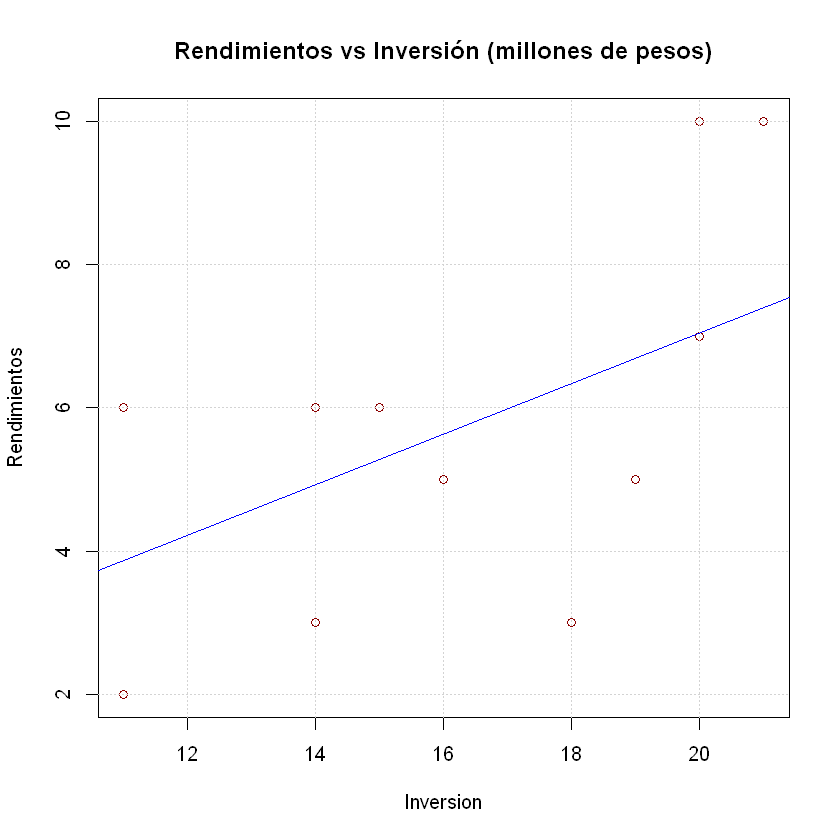

In [4]:
#Gráfica
plot(x,y, main="Rendimientos vs Inversión (millones de pesos)", 
     col="darkred",
     ylab="Rendimientos", 
     xlab="Inversion")
grid()
abline(model2, col="blue")

###### Calcular la previsión de inversión que se obtendrá con un rendimiento de $1 250 000

Para hacer inferencias con este modelo se tiene que hacer un test de normalidad

In [5]:
#Normalidad
shapiro.test(resid(model2))


	Shapiro-Wilk normality test

data:  resid(model2)
W = 0.9586, p-value = 0.7637


Como se puede observar, existe evidencia
estadística para afirmar que los residuos se
distribuyen normalmente (p-valor = 0.7637).


También, cuando se realizan inferencias con
series temporales para invertir, generalmente
se asume que el modelo lineal estimado no es estacionario en el periodo estudiado.
Es decir, se asume que no hay autocorrelación: los errores del pasado no están
relacionados con los del futuro. Para esto, en R se puede importar la librería
“lmtest” y efectuar una prueba de Durbin-Watson:

In [6]:
#libreria para tests en modelos lineales
library(lmtest)

#Autocorrelación
dwtest(model2)

Warning message:
"package 'lmtest' was built under R version 3.6.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  model2
DW = 1.6595, p-value = 0.2726
alternative hypothesis: true autocorrelation is greater than 0


Como el p-valor asociado al
estadístico Durbin-Watson
es superior al 5%, se acepta
la hipotesis nula de que los
residuos o errores no están
correlacionados.


Entonces, ya que se comprobaron los supuestos, se puede hacer la predicción:

In [7]:
#Predicción
1250000 / model2$coefficients[1]

x 
3543637

Para tener rendimientos de 1,250,000 pesos se necesitaría una inversión de 3,543,637

#### Fuentes:

- Ferre Jaén M. E. (2019) Regresión Lineal Simple. Apuntes del curso FEIR3, curso 2014/15 actualizados. Extraído el 22 de julio de 2020 de: http://gauss.inf.um.es/feir/40/#2_regresi%C3%B3n_lineal_simple
- Gujarati & Porter (2010) Pruebas de normalidad. Econometría (5ta Edición). McGrawHill Education. Ciudad de México.
- R Core Team (2018) R: A language and environment for statistical computing. [Computer Software]. Extraído de https://www.cran.r-project.org/
- Teetor P. (2011). General Statistics (Ch. 9) R Cookbook. O’Reilly Media. Sebastopol, CA, USA.
- UnADM (s. f.) Herramientas y lenguajes computacionales. Unidad 2. Estadística con R. Clave 05142313. Universidad Abierta y a Distancia de México.
- Zill D. G. () Método de los mínimos cuadrados (p. 393-). Matrices (Cap. 7). Matemáticas avanzadas para ingeniería, vol. 1: ecuaciones diferenciales (tercera edición). McGraw-Hill Education. Ciudad de México